<a href="https://colab.research.google.com/github/tdlima/analise_expl_AVW-DIO/blob/main/Analise_Exp_vendas_AVW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Projeto de análise exploratória de vendas na base de dados da AdventureWorks, empresa multinacional de manufatura.

In [38]:
# Realizando importes
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid')

# Obtendo algumas informações da nossa base de dados.

In [ ]:
# Realizando a leitura da base de dados
df = pd.read_excel('/content/drive/MyDrive/Datasets/AdventureWorks.xlsx')

In [ ]:
# Visualizando as 5 primeiras linhas da base
df.head()

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
1,2008-05-12,2008-05-17,306,384,19051,200805123CS567,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
2,2008-05-14,2008-05-20,306,384,19052,200805143CS576,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
3,2008-05-21,2008-05-27,306,384,19052,200805213CS576,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
4,2008-06-20,2008-06-27,306,384,19053,200806203CS586,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red


In [ ]:
# Obtendo a quantidade de linhas e colunas da base
df.shape

(904, 16)

In [ ]:
# Verificando o tipo dos dados
df.dtypes

Data Venda        datetime64[ns]
Data Envio        datetime64[ns]
ID Loja                    int64
ID Produto                 int64
ID Cliente                 int64
No. Venda                 object
Custo Unitário           float64
Preço Unitário           float64
Quantidade                 int64
Valor Desconto           float64
Valor Venda              float64
Produto                   object
Fabricante                object
Marca                     object
Classe                    object
Cor                       object
dtype: object

In [ ]:
# Verificando se a base de dados possui valores ausentes
df.isnull().sum()

Data Venda        0
Data Envio        0
ID Loja           0
ID Produto        0
ID Cliente        0
No. Venda         0
Custo Unitário    0
Preço Unitário    0
Quantidade        0
Valor Desconto    0
Valor Venda       0
Produto           0
Fabricante        0
Marca             0
Classe            0
Cor               0
dtype: int64

In [ ]:
# Aplicando formatação para dados flutuantes
pd.options.display.float_format = '{:20,.2f}'.format

# Respondendo a perguntas de Negócio: Obtendo informações de vendas.

In [ ]:
# Encontrando a receita bruta
round(df['Valor Venda'].sum(), 2) # Fanzendo o arredondamento para 2 casas decimais

### Receita: R$ 5.984.606,14

## Encontrando o custo total.

In [ ]:
# Criando uma nova coluna 'Custo'
df['Custo'] = df['Custo Unitário'].mul(df['Quantidade'])

In [ ]:
# Verificando a nova coluna criada
df.head(1)

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,Custo
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48"


In [ ]:
# Calculando custo Total
round(df['Custo'].sum(), 2)

### Custo Total: R$ 2.486.783,05

## Encontrando o lucro.

In [ ]:
# Criando a coluna lucro
df['Lucro'] = df['Valor Venda'] - df['Custo']

In [ ]:
# Calculando lucro
round(df['Lucro'].sum(), 2)

### Lucro: R$ 3.497.823,09

## Calculando o lucro por ano e por marca

In [ ]:
# Realizando o agrupamento de lucro por ano e marca
df.groupby([df['Data Venda'].dt.year, 'Marca'])['Lucro'].sum()

In [ ]:
# Montando novo dataframe para visualização dos dados obtidos
df.groupby([df['Data Venda'].dt.year, 'Marca'])['Lucro'].sum().reset_index().head(6)

,Data Venda,Marca,Lucro
0,2008,Adventure Works,"306,641.16"
1,2008,Contoso,"56,416.00"
2,2008,Fabrikam,"1,557,020.55"
3,2009,Adventure Works,"405,395.08"
4,2009,Contoso,"138,258.95"
5,2009,Fabrikam,"1,034,091.35"


## Obtendo o total de produtos vendidos.

In [ ]:
df.groupby('Produto')['Quantidade'].sum().sort_values(ascending=False)

In [30]:
# Visualizando os dados em um dataframe
df.groupby('Produto')['Quantidade'].sum().sort_values(ascending=False).reset_index().head(9)

,Produto,Quantidade
0,Headphone Adapter for Contoso Phone E130 Silver,25232
1,Headphone Adapter for Contoso Phone E130 White,25008
2,Adventure Works Laptop15.4W M1548 Black,1089
3,Fabrikam Trendsetter 2/3'' 17mm X100 Grey,1087
4,Adventure Works Laptop15.4W M1548 Red,1047
5,Fabrikam Trendsetter 2/3'' 17mm X100 Black,926
6,Fabrikam Trendsetter 1/3'' 8.5mm X200 Black,884
7,Fabrikam Trendsetter 1/3'' 8.5mm X200 Grey,845
8,Fabrikam Trendsetter 1/3'' 8.5mm X200 White,789


# Analisando Dados Logísticos.

## Calculando o tempo para o envio de produtos.

In [ ]:
# Criando coluna 'Tempo Envio'
df['Tempo Envio'] = df['Data Envio'] - df['Data Venda']

In [95]:
df.head(1)

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,Custo,Lucro,Tempo Envio
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",20


### Transformando a coluna 'Tempo Envio' em numerica para Obter a média do tempo de envio por marca.

In [ ]:
# Extraindo os dias
df['Tempo Envio'] = (df['Data Envio'] - df['Data Venda']).dt.days

In [ ]:
df.head(1)

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,Custo,Lucro,Tempo Envio
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",20


In [ ]:
# Verificando o tipo de dado da coluna 'Tempo Envio
df['Tempo Envio'].dtype

dtype('int64')

In [31]:
# Calculando a média de tempo e exibindo os resultados
round(df.groupby(df['Marca'])['Tempo Envio'].mean(), 2).reset_index().head(4)

,Marca,Tempo Envio
0,Adventure Works,8.66
1,Contoso,8.47
2,Fabrikam,8.51


# Análises Grafica

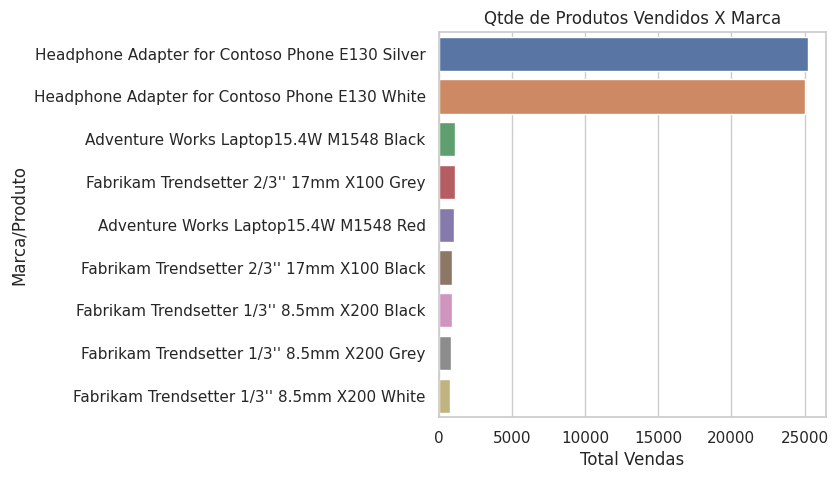

In [46]:
# Total de produtos vendidos por marca
plt.figure(figsize=(5,5))

total = df.groupby('Produto')['Quantidade'].sum().sort_values(ascending=False)

sns.barplot(x=total.values, y=total.index, orient='h')
plt.title('Qtde de Produtos Vendidos X Marca')
plt.xlabel('Total Vendas')
plt.ylabel('Marca/Produto');

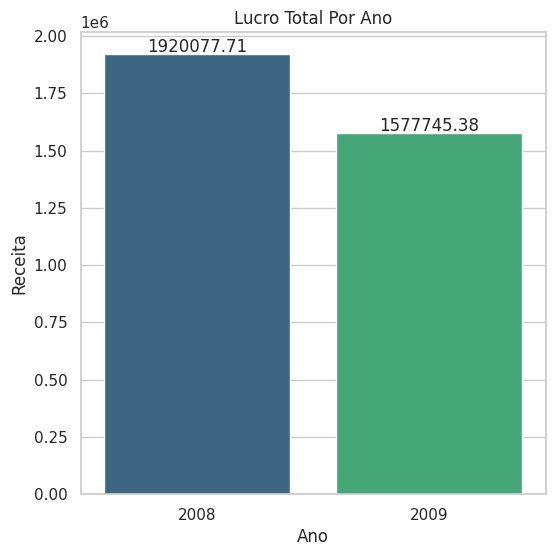

In [72]:
# Lucro total por ano
plt.figure(figsize=(6,6))

lucro_ano = df.groupby(df['Data Venda'].dt.year)['Lucro'].sum()

bp = sns.barplot(x=lucro_ano.index, y=lucro_ano.values, palette="viridis")
plt.title('Lucro Total Por Ano')
plt.xlabel('Ano')
plt.ylabel('Receita');

for p in bp.patches:
    bp.annotate(format(p.get_height(), '.2f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 5),
                textcoords = 'offset points')

In [73]:
# Selecionando somente as vendas de 2009
vd_2009 = df[df['Data Venda'].dt.year == 2009]

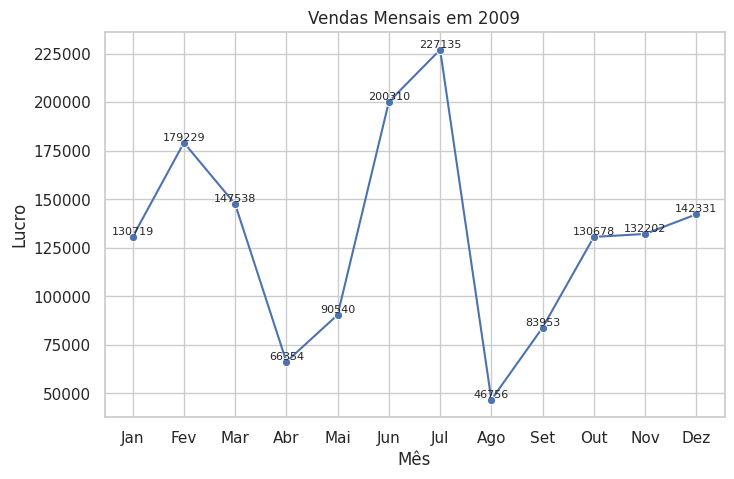

In [108]:
# Criando gráfico de linha de vendas mensais
vd_mes_1 = vd_2009.groupby(df['Data Venda'].dt.month)['Lucro'].sum().reset_index()
plt.figure(figsize=(8,5))

lp = sns.lineplot(x=vd_mes_1['Data Venda'], y=vd_mes_1['Lucro'], marker='o', linestyle='-')

for x, y in zip(vd_mes_1['Data Venda'], vd_mes_1['Lucro']):
    lp.text(x, y, f'{y:.0f}', ha='center', va='bottom', fontsize=8)

plt.title('Vendas Mensais em 2009')
plt.xlabel('Mês')
plt.ylabel('Lucro')
plt.xticks(range(1, 13), ['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez'])
plt.grid(True)


In [107]:
# Selecionando as vendas de 2008
vd_2008 = df[df['Data Venda'].dt.year == 2008]

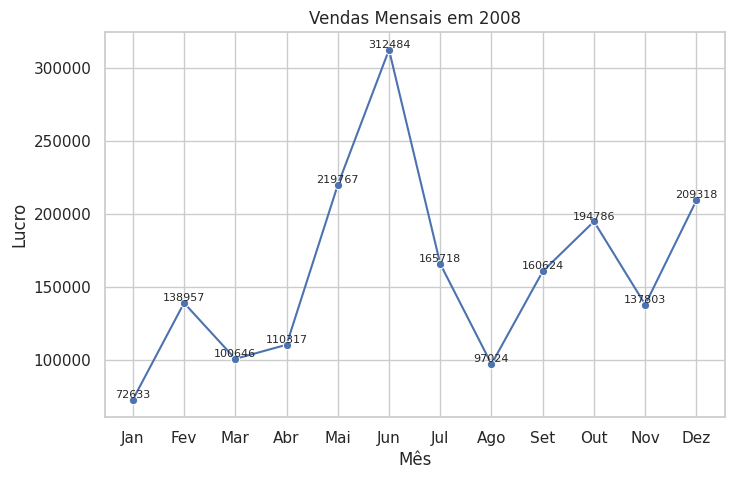

In [115]:
vd_mes_2 = vd_2008.groupby(df['Data Venda'].dt.month)['Lucro'].sum().reset_index()
plt.figure(figsize=(8,5))

lp = sns.lineplot(x=vd_mes_2['Data Venda'], y=vd_mes_2['Lucro'], marker='o', linestyle='-')

for x, y in zip(vd_mes_2['Data Venda'], vd_mes_2['Lucro']):
    lp.text(x, y, f'{y:.0f}', ha='center', va='bottom', fontsize=8)

plt.title('Vendas Mensais em 2008')
plt.xlabel('Mês')
plt.ylabel('Lucro')
plt.xticks(range(1, 13), ['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez'])
plt.grid(True)

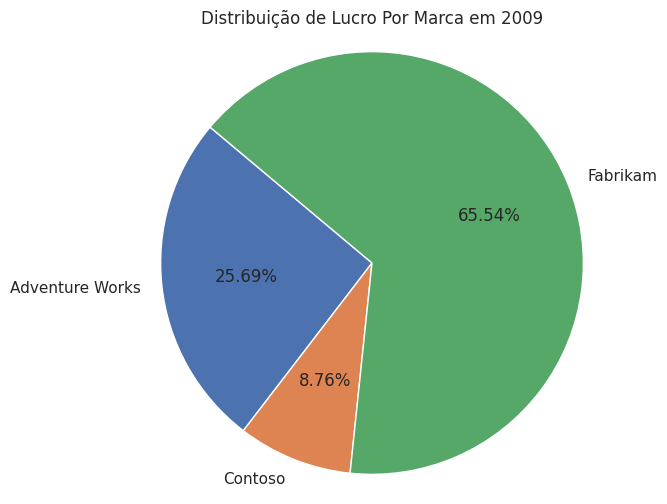

In [93]:
# Criando o gráfico de pizza lucro por marca em 2009
sns.set_style("whitegrid")

lc_marca = vd_2009.groupby('Marca')['Lucro'].sum().reset_index()

plt.figure(figsize=(6,6))
plt.pie(lc_marca['Lucro'], labels=lc_marca['Marca'], autopct='%1.2f%%', startangle=140)
plt.axis('equal')
plt.title('Distribuição de Lucro Por Marca em 2009');

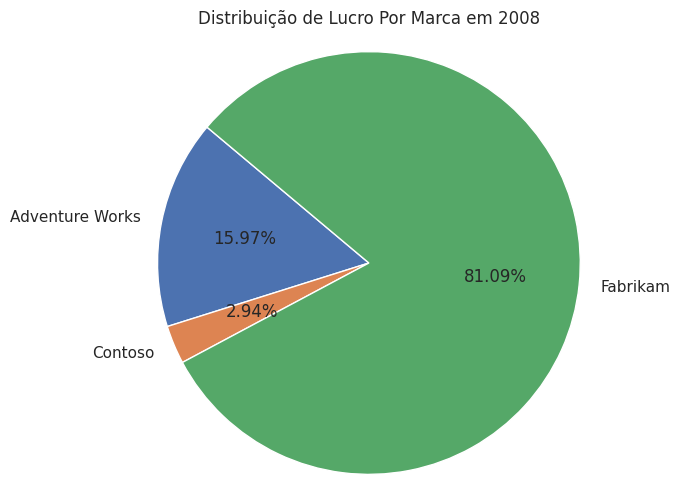

In [111]:
# Criando o gráfico de pizza lucro por marca em 2008
sns.set_style("whitegrid")

lc_marca = vd_2008.groupby('Marca')['Lucro'].sum().reset_index()

plt.figure(figsize=(6,6))
plt.pie(lc_marca['Lucro'], labels=lc_marca['Marca'], autopct='%1.2f%%', startangle=140)
plt.axis('equal')
plt.title('Distribuição de Lucro Por Marca em 2008');

In [106]:
# Analisando estatísticas do tempo de envio
df['Tempo Envio'].describe()

count                 904.00
mean                    8.54
std                     3.06
min                     4.00
25%                     6.00
50%                     9.00
75%                    11.00
max                    20.00
Name: Tempo Envio, dtype: float64

#### A análise acima nos mostra que:
####- 25% dos envios foram feitos em até 6 dias
####- 50% em até 9 dias
####- 75% 11 dias
####- O Minimo para envio de um produto são 4 dias
####- E foi identificado um valor maxímo de 20 dias que esta fora dos padrões, o que pode indicar algum problema coma a entrega ou com o dado em si.
####
####Podemos analisar isso visualizando os gráficos abaixo.

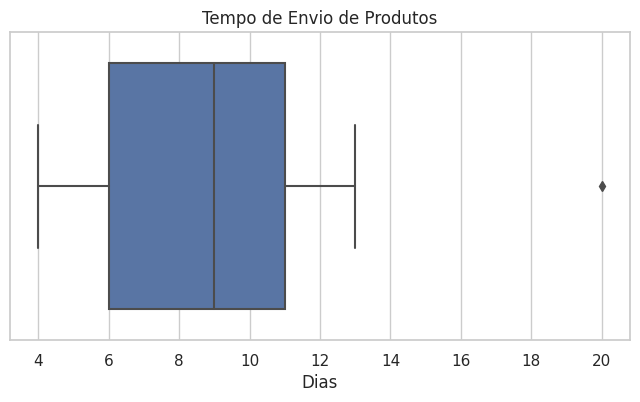

In [114]:
# Analisando o tempo de envio
plt.figure(figsize=(8,4))

sns.boxplot(x=df['Tempo Envio'])

plt.title('Tempo de Envio de Produtos')
plt.xlabel('Dias');

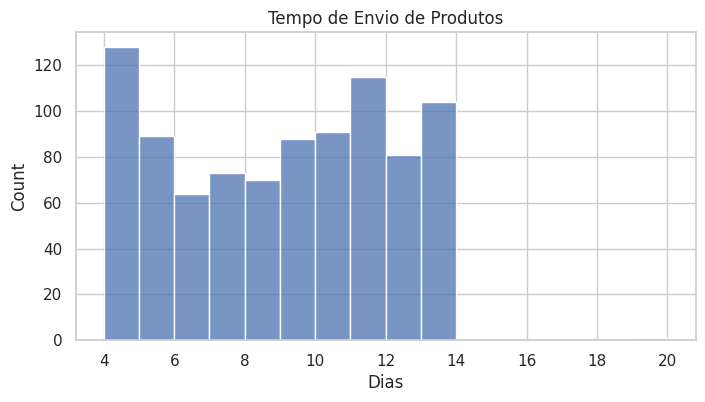

In [112]:
plt.figure(figsize=(8,4))

sns.histplot(x=df['Tempo Envio'])

plt.title('Tempo de Envio de Produtos')
plt.xlabel('Dias');

In [113]:
df.to_csv('vendas_adw.csv', index=False)